# Prediction using Unsupervised ML

In [1]:
# Required modules

import numpy as np
import pandas as pd
import seaborn as sns

from itertools import combinations
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Some Configurations

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 7)

## Loading the data

In [3]:
# Loading the data

iris = pd.read_csv('./Iris.csv', index_col=['Id'])
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


## Exploartory Data Analysis

In [4]:
# Inspecting the data

iris.info()
iris.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


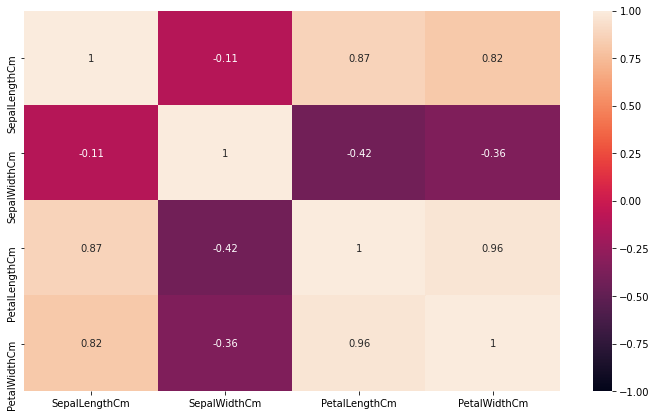

In [5]:
# Correlation matrix

sns.heatmap(iris.corr(), annot=True, vmin=-1, vmax=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9624d1250>,
      dtype=object)

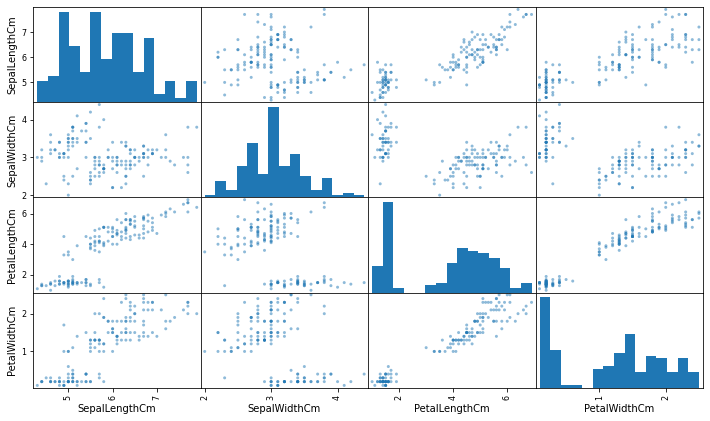

In [6]:
# Visualizing the pair plot

pd.plotting.scatter_matrix(iris, hist_kwds={'bins': 15})

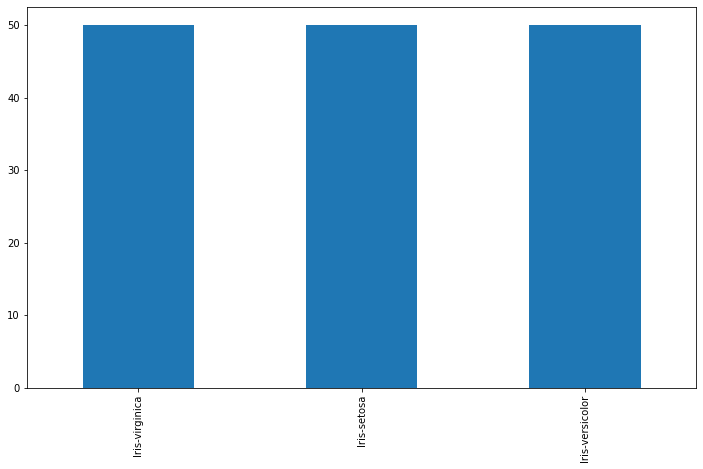

In [7]:
# Distribution of Species

iris['Species'].value_counts().plot(kind='bar')

## Data Preparation

In [8]:
# Separating out features and labels

X = iris.loc[:, iris.columns != 'Species'].values
y = iris['Species']

In [9]:
# Scaling the data

scaler = MinMaxScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

## Appling the K-Means

In [10]:
# Apply kmeans

interias = list()
clusters = range(1, 11)

for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster, n_init=30, max_iter=400, random_state=88, n_jobs=-1)
    kmeans.fit(X_scaled)

    interias.append(kmeans.inertia_)

As we have collected all the interias from clusters 1 to 10, let's make a elbow plot to decide an optimal number of clusters.

Text(0, 0.5, 'Interias')

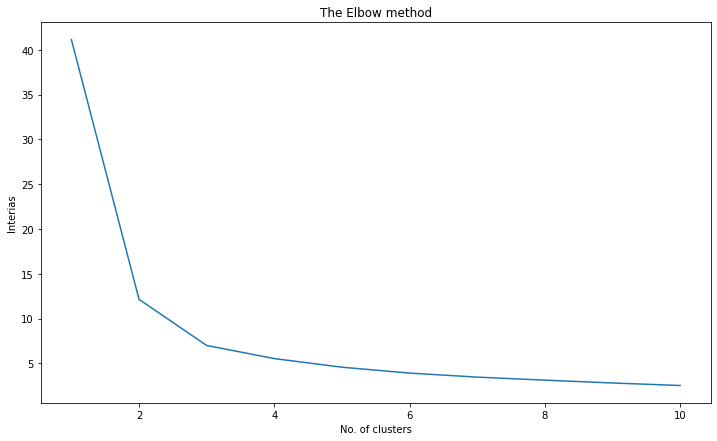

In [11]:
# Making an elbow plot

plt.plot(clusters, interias)
plt.title('The Elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('Interias')

From the above plot, we can see that the optimal number of clusters are 3, when the within cluster sum of squares (Inertia) doesn't decrease significantly with every iteration.

In [12]:
# Applying the kmeans with the optimal number of clusters

kmeans = KMeans(n_clusters=3, n_init=30, max_iter=400, random_state=88, n_jobs=-1)
kmeans.fit(X_scaled)

y_cluster = kmeans.predict(X_scaled)

## Visualing the Clusters

In [13]:
# Getting some important contsnats

feature_names = iris.columns[iris.columns != 'Species'].tolist()

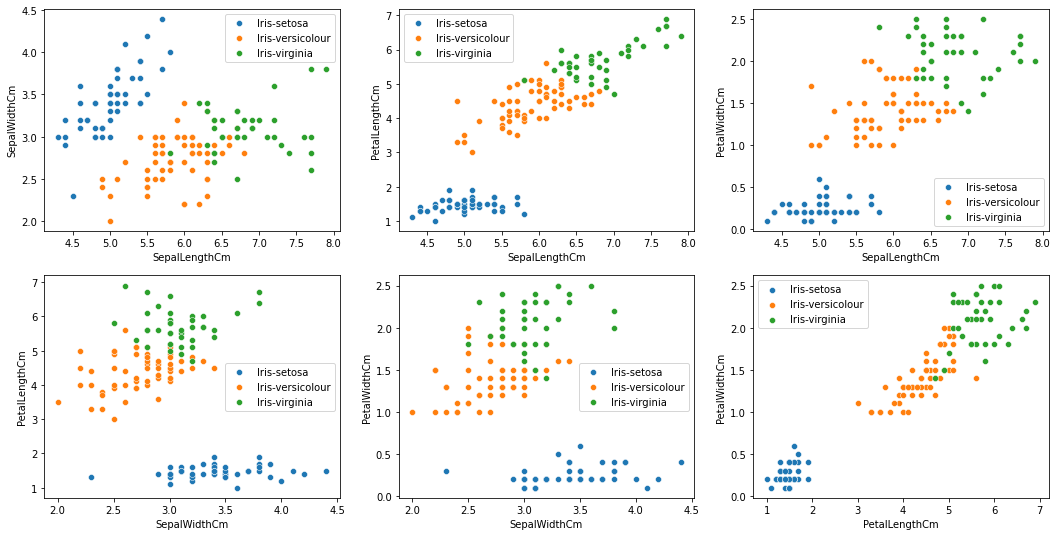

In [14]:
# Making a pairplot(6 plots)

_, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 9))

comb = combinations(feature_names, 2)

for i, (x, y) in enumerate(comb):
    idx_x = feature_names.index(x)
    idx_y = feature_names.index(y)

    sns.scatterplot(x=x, y=y, data=iris.loc[:, [x, y]][y_cluster == 0], ax=ax[int(i/3), i%3], label = 'Iris-setosa')
    sns.scatterplot(x=x, y=y, data=iris.loc[:, [x, y]][y_cluster == 1], ax=ax[int(i/3), i%3], label = 'Iris-versicolour')
    sns.scatterplot(x=x, y=y, data=iris.loc[:, [x, y]][y_cluster == 2], ax=ax[int(i/3), i%3], label = 'Iris-virginia')

In [15]:
# Making a triplot(4 plots)

comb = list(combinations(feature_names, 3))

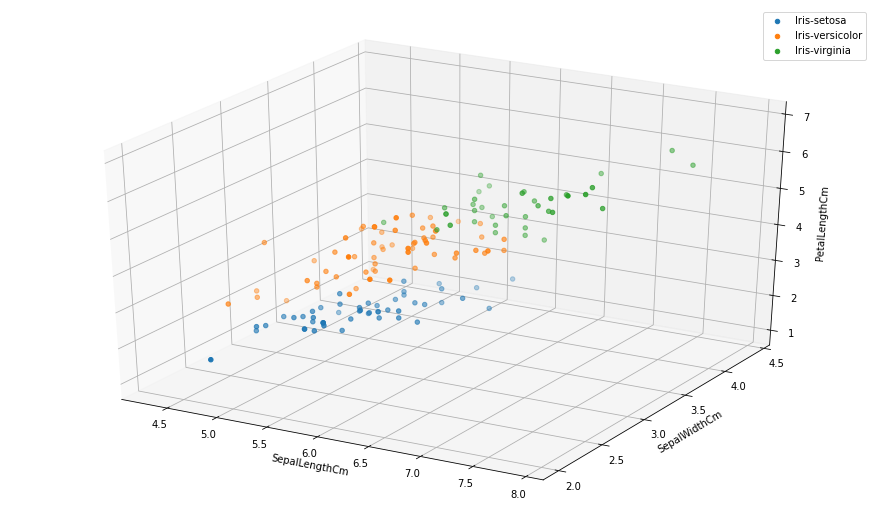

In [16]:
# Plot-1

fig = plt.figure()
ax = Axes3D(fig)

x, y, z = comb[0]
ax.scatter(iris.loc[:, x][y_cluster == 0], iris.loc[:, y][y_cluster == 0], iris.loc[:, z][y_cluster == 0], label='Iris-setosa')
ax.scatter(iris.loc[:, x][y_cluster == 1], iris.loc[:, y][y_cluster == 1], iris.loc[:, z][y_cluster == 1], label='Iris-versicolor')
ax.scatter(iris.loc[:, x][y_cluster == 2], iris.loc[:, y][y_cluster == 2], iris.loc[:, z][y_cluster == 2], label='Iris-virginia')

ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)

ax.legend()

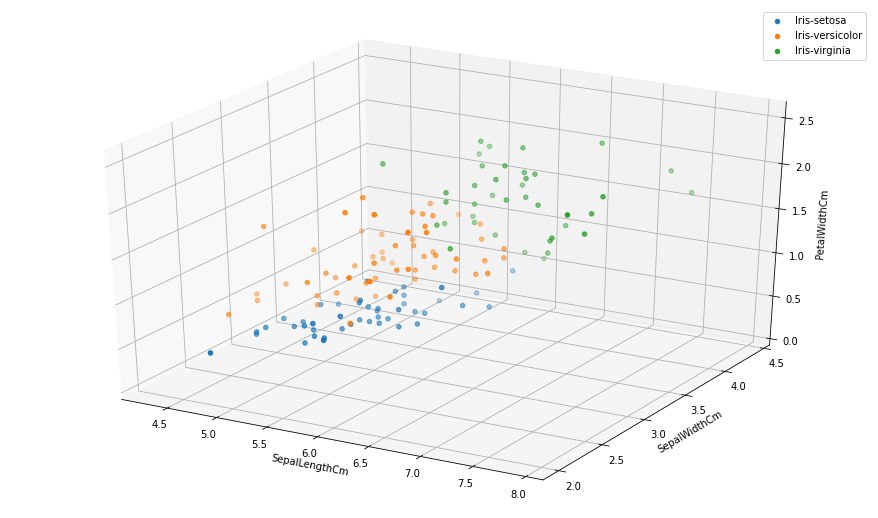

In [17]:
# Plot-2

fig = plt.figure()
ax = Axes3D(fig)

x, y, z = comb[1]
ax.scatter(iris.loc[:, x][y_cluster == 0], iris.loc[:, y][y_cluster == 0], iris.loc[:, z][y_cluster == 0], label='Iris-setosa')
ax.scatter(iris.loc[:, x][y_cluster == 1], iris.loc[:, y][y_cluster == 1], iris.loc[:, z][y_cluster == 1], label='Iris-versicolor')
ax.scatter(iris.loc[:, x][y_cluster == 2], iris.loc[:, y][y_cluster == 2], iris.loc[:, z][y_cluster == 2], label='Iris-virginia')

ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)

ax.legend()

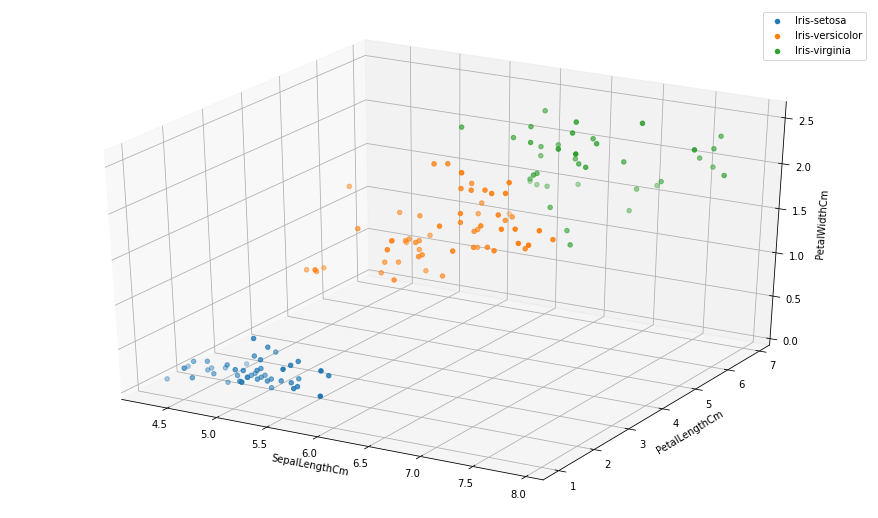

In [18]:
# Plot-3

fig = plt.figure()
ax = Axes3D(fig)

x, y, z = comb[2]
ax.scatter(iris.loc[:, x][y_cluster == 0], iris.loc[:, y][y_cluster == 0], iris.loc[:, z][y_cluster == 0], label='Iris-setosa')
ax.scatter(iris.loc[:, x][y_cluster == 1], iris.loc[:, y][y_cluster == 1], iris.loc[:, z][y_cluster == 1], label='Iris-versicolor')
ax.scatter(iris.loc[:, x][y_cluster == 2], iris.loc[:, y][y_cluster == 2], iris.loc[:, z][y_cluster == 2], label='Iris-virginia')

ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)

ax.legend()

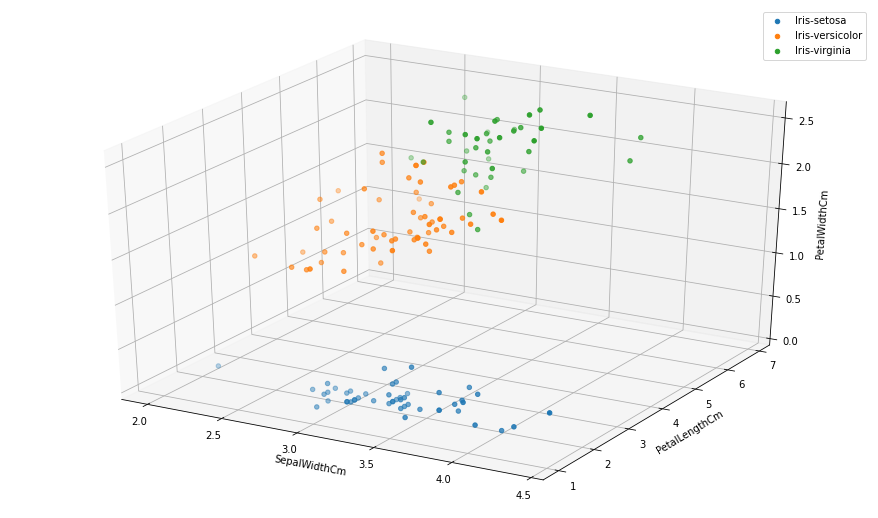

In [19]:
# Plot-4

fig = plt.figure()
ax = Axes3D(fig)

x, y, z = comb[3]
ax.scatter(iris.loc[:, x][y_cluster == 0], iris.loc[:, y][y_cluster == 0], iris.loc[:, z][y_cluster == 0], label='Iris-setosa')
ax.scatter(iris.loc[:, x][y_cluster == 1], iris.loc[:, y][y_cluster == 1], iris.loc[:, z][y_cluster == 1], label='Iris-versicolor')
ax.scatter(iris.loc[:, x][y_cluster == 2], iris.loc[:, y][y_cluster == 2], iris.loc[:, z][y_cluster == 2], label='Iris-virginia')

ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)

ax.legend()